In this notebook we implement simple tracking using hungarian algorithm for matching on the distant graph. Error correction using k-means is in the other notebook (error_correction)

In [1]:
import cv2 as cv 
import numpy as np

from flytracker.utils import run_tracker
import matplotlib.pyplot as plt 

from scipy.optimize import linear_sum_assignment
from scipy.spatial import distance_matrix

%load_ext autoreload
%autoreload 2

# Class for tracking

In [2]:
class Tracking:
    def __call__(self, coordinates_i, coordinates_j):
        identities_j = linear_sum_assignment(distance_matrix(coordinates_i, coordinates_j))[1].squeeze()
        return identities_j

# Implementing

We know the first 100 frames have 40 flies, let's use those as testset:

In [29]:
dataset = run_tracker(100)
n_flies = 40

Let's use the first two steps as test:

In [3]:
coordinates_ini = coordinates[0]
coordinates_next = coordinates[1]

In [34]:
# We identify the flies according to their initial ordering
identies_i = np.arange(n_flies)

# We calculate the distance matrix
dist_matrix = distance_matrix(coordinates_ini, coordinates_next)

# Apply hungarian to identities of second frame
identities_j = linear_sum_assignment(dist_matrix)[1] # row columns are always ordered

In [35]:
identities_j[identities]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 22, 26, 25,
       17, 18, 19, 23, 14, 20, 21, 24, 16, 15, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [ ]:
Tracking(coordinates_ini, coordinates_next, )

# testing code

In [35]:
%%time
dataset = run_tracker(100)

CPU times: user 1.76 s, sys: 184 ms, total: 1.94 s
Wall time: 973 ms


In [31]:
dataset.shape

(4000, 4)

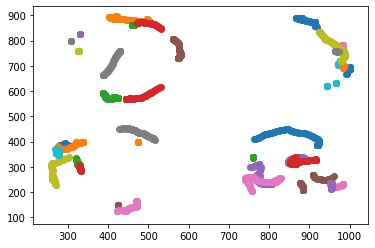

In [34]:
for fly in np.arange(40):
    plt.scatter(dataset[dataset[:, 1] == fly][:, 2], dataset[dataset[:, 1] == fly][:, 3])

It works :-) Now to implement the error correction...